In [1]:
!pip install pandas matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(
    'AAPL_raw.csv',
    skiprows=3,
    names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'],
    index_col='Date',
    parse_dates=True        
)
df.head(10)

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.261044,24.729267,23.821668,24.718171,212818400
2015-01-05,23.577574,24.110150,23.391173,24.030263,257142000
2015-01-06,23.579794,23.839424,23.218085,23.641928,263188400
2015-01-07,23.910437,24.010294,23.677434,23.788387,160423600
2015-01-08,24.829134,24.886830,24.121251,24.238863,237458000
2015-01-09,24.855759,25.130922,24.456326,25.002216,214798000
2015-01-12,24.243292,24.993335,24.143435,24.986678,198603200
2015-01-13,24.458544,25.031063,24.167847,24.727051,268367600
2015-01-14,24.365339,24.518454,24.076860,24.196690,195826400


In [4]:
df.shape

(2672, 5)

In [5]:
df.info

<bound method DataFrame.info of                  Close        High         Low        Open     Volume
Date                                                                 
2015-01-02   24.261044   24.729267   23.821668   24.718171  212818400
2015-01-05   23.577574   24.110150   23.391173   24.030263  257142000
2015-01-06   23.579794   23.839424   23.218085   23.641928  263188400
2015-01-07   23.910437   24.010294   23.677434   23.788387  160423600
2015-01-08   24.829134   24.886830   24.121251   24.238863  237458000
...                ...         ...         ...         ...        ...
2025-08-12  229.649994  230.800003  227.070007  228.009995   55626200
2025-08-13  233.330002  235.000000  230.429993  231.070007   69878500
2025-08-14  232.779999  235.119995  230.850006  234.059998   51916300
2025-08-15  231.589996  234.279999  229.339996  234.000000   56038700
2025-08-18  230.889999  233.119995  230.110001  231.699997   37451700

[2672 rows x 5 columns]>

In [6]:
df.describe()

,Close,High,Low,Open,Volume
count,2672.000000,2672.000000,2672.000000,2672.000000,2.672000e+03
mean,101.061157,102.075724,99.944003,100.968045,1.136290e+08
std,69.792061,70.480376,69.018273,69.712657,6.804936e+07
min,20.624050,20.927680,20.425436,20.546430,2.323470e+07
25%,36.265045,36.484779,35.929499,36.260833,6.777740e+07
50%,76.727558,77.299974,75.979730,76.546423,9.650920e+07
75%,162.982140,164.627783,161.648769,162.966115,1.385533e+08
max,258.103729,259.179926,256.718662,257.276679,6.488252e+08


In [7]:
df.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

array([[<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

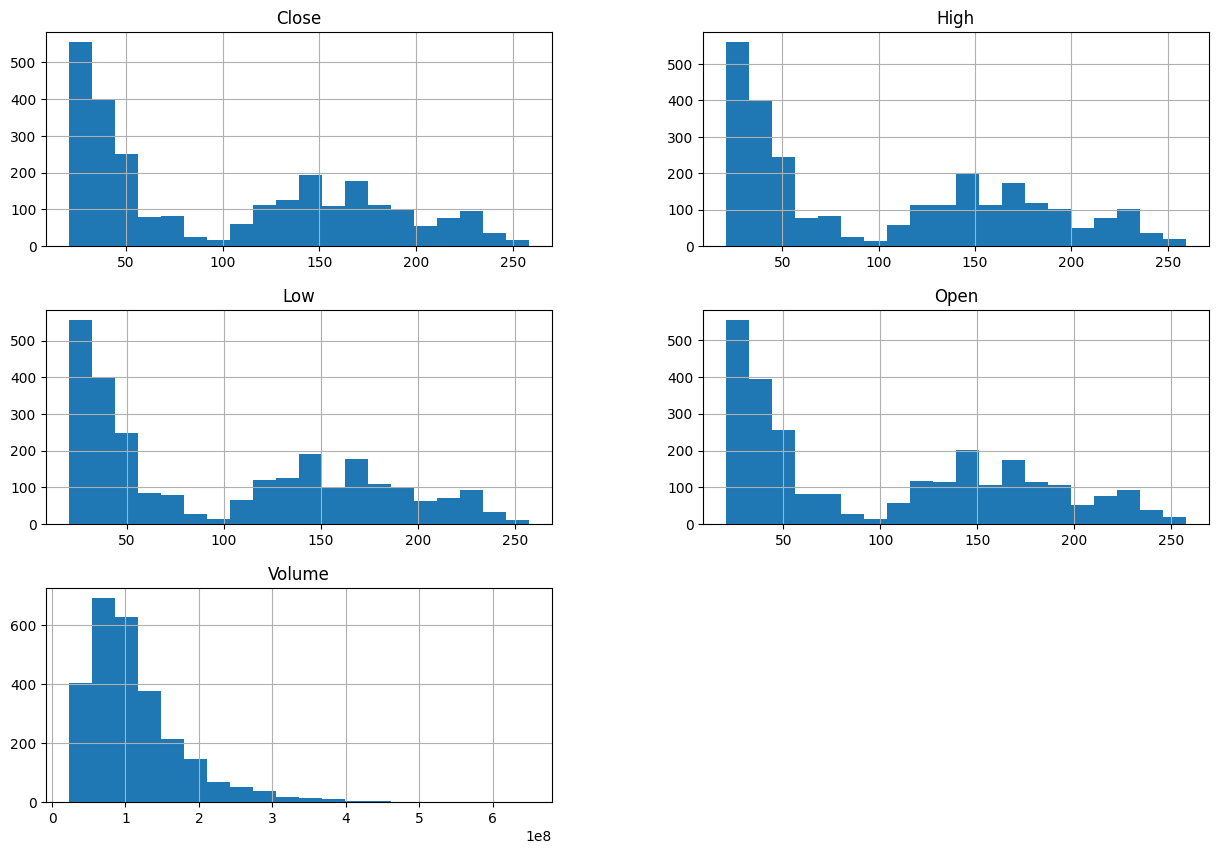

In [8]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10), bins=20)

<Axes: >

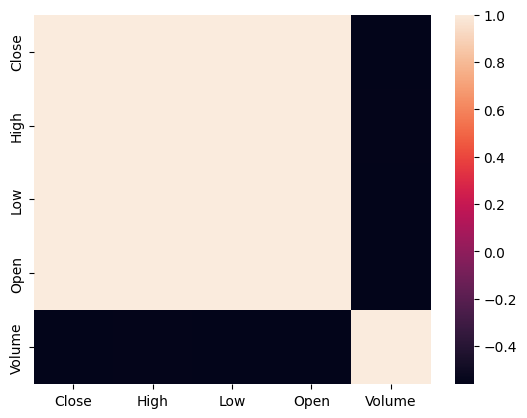

In [9]:
import seaborn as sns
corr_matrix = df.corr()

sns.heatmap(corr_matrix)

In [10]:
close_prices = df['Close'].values.reshape(-1, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [12]:
def create_sequences(df, seq_length=60):
    data_array = df.to_numpy()  # ensure NumPy array
    X, y = [], []
    
    for i in range(seq_length, len(data_array)):
        X.append(data_array[i-seq_length:i, 0])  # column 0: 'Close'
        y.append(data_array[i, 0])
    
    X = np.array(X)
    y = np.array(y)
    
    # reshape X for LSTM: (samples, timesteps, features)
    X = np.expand_dims(X, axis=2)
    return X, y

In [13]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [14]:
X_train, y_train = create_sequences(pd.DataFrame(train_data))
X_test, y_test = create_sequences(pd.DataFrame(test_data))

In [15]:
print(X_train.shape)
print(y_train.shape)  
print(X_train[0])  

(2077, 60, 1)
(2077,)
[[0.01531497]
 [0.01243695]
 [0.0124463 ]
 [0.0138386 ]
 [0.01770713]
 [0.01781924]
 [0.01524022]
 [0.01614662]
 [0.01575414]
 [0.01296957]
 [0.012194  ]
 [0.01474496]
 [0.01552057]
 [0.0181837 ]
 [0.01872563]
 [0.01883778]
 [0.01513744]
 [0.02090284]
 [0.02425743]
 [0.0226315 ]
 [0.02400511]
 [0.02402382]
 [0.02487412]
 [0.02567155]
 [0.02472403]
 [0.02546515]
 [0.0276228 ]
 [0.03030581]
 [0.03178802]
 [0.03236966]
 [0.03307325]
 [0.03390815]
 [0.03365485]
 [0.03463987]
 [0.03792326]
 [0.0371446 ]
 [0.03397381]
 [0.03550295]
 [0.03366425]
 [0.03425527]
 [0.03450852]
 [0.03373928]
 [0.03174111]
 [0.03191936]
 [0.03242593]
 [0.02995867]
 [0.02782916]
 [0.0299024 ]
 [0.02909564]
 [0.03037147]
 [0.0323321 ]
 [0.03367362]
 [0.03276364]
 [0.03126268]
 [0.0324916 ]
 [0.0320038 ]
 [0.02889862]
 [0.0297054 ]
 [0.02877668]
 [0.03170359]]


In [16]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

In [17]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']